In [1]:
import os
import pandas as pd

BASE_PATH = "/Users/jesus/Desktop/4geeks/4geeks - random forest/jesus-cuenca-random-forestmachine-learning-python-template/data/processed/excels"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_sel_k4.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_sel_k4.xlsx"
   
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    
# Crear y entrenar el modelo de Random Forest
    model = RandomForestClassifier(
        random_state=42, 
    )
    
    model.fit(dataset, y_train)
    
    # Hacer predicciones
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    # Guardar los resultados
    results.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )

results

0
1


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[{'train': 1.0, 'test': 0.7207792207792207},
 {'train': 1.0, 'test': 0.7142857142857143},
 {'train': 1.0, 'test': 0.7662337662337663}]

hay overfiting, el mejor igualmente sería el 2

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Seleccionar el mejor dataset basado en los resultados previos
best_dataset = 2  # Porque la posición 0 tiene el mejor accuracy en train y test

# Definir los hiperparámetros a probar
hyperparams = {
    "n_estimators": [50],  # Número de árboles en el bosque
    "criterion": ["gini", "entropy"],   
    "max_depth": [3, 4, 5, 6, 7, 8, 10],  
    "min_samples_split": [2, 5, 10],   
    "min_samples_leaf": [1, 2, 5, 10]  
}

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5, n_jobs=-1)


In [4]:
grid.fit(TRAIN_DATASETS[best_dataset], y_train)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklea

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [5]:
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [6]:
grid.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

In [7]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.
final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

In [8]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)
print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.8143322475570033,)
Score test: 0.7727272727272727


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


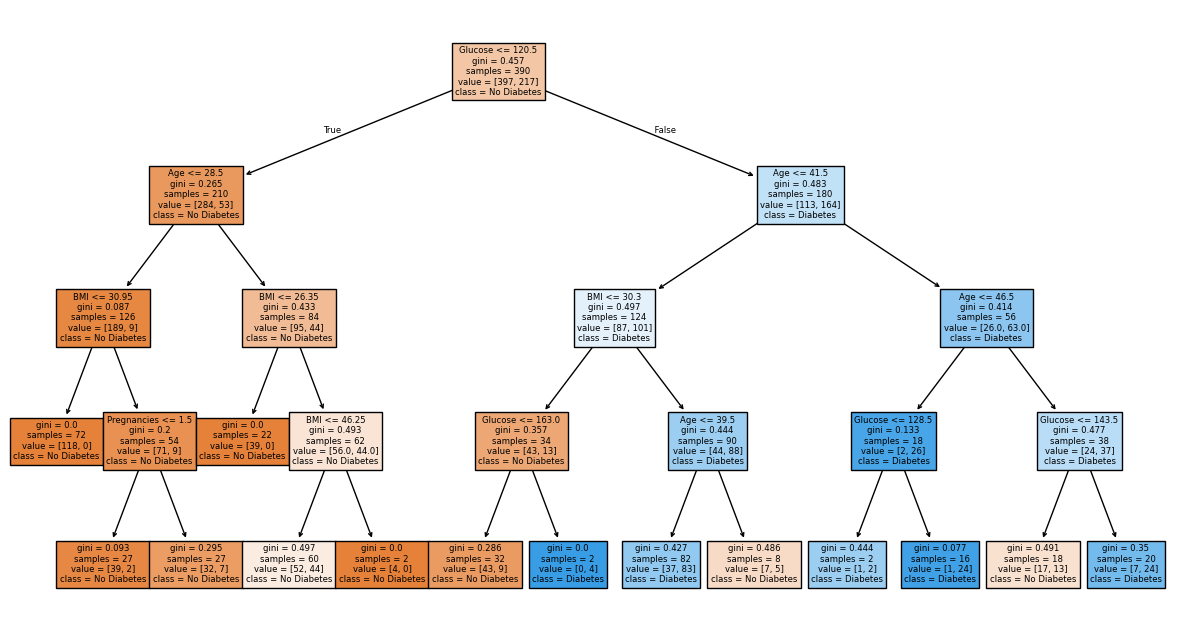

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Obtener el mejor modelo entrenado automáticamente con los mejores hiperparámetros
final_model = grid.best_estimator_

# Entrenar el modelo con el mejor dataset
final_model.fit(TRAIN_DATASETS[best_dataset], y_train)

# Hacer predicciones en el conjunto de entrenamiento y prueba
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

# Visualizar uno de los árboles individuales dentro del Random Forest
plt.figure(figsize=(15, 8))
plot_tree(final_model.estimators_[0],  # Elegimos el primer árbol del bosque
          feature_names=TRAIN_DATASETS[best_dataset].columns, 
          class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [10]:
import pickle

# Guardar el GridSearchCV completo
with open("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/random-forest-machine-learning-python-template/models/grid_search.pkl", "wb") as f:
    pickle.dump(grid, f)

# Guardar el mejor modelo entrenado
with open("/Users/jesus/Desktop/4geeks/4geeks - árbol de decisiones/random-forest-machine-learning-python-template/models/best_model.pkl", "wb") as f:
    pickle.dump(final_model, f)
